FH2


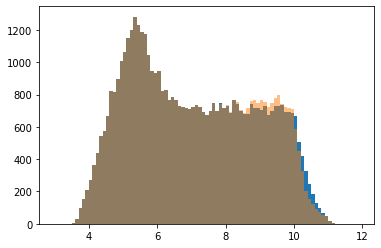

FP: 0.13926 FN: 0.86824
FP: 0.06166 FN: 0.95006
FCH4


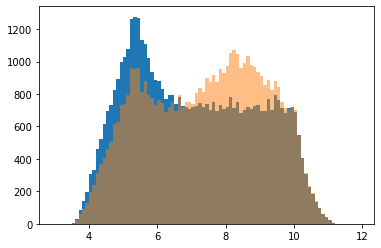

FP: 0.2285 FN: 0.74526
FP: 0.15964 FN: 0.83236
R1


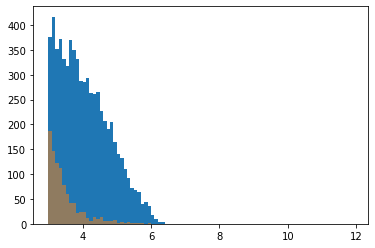

FP: 0.47414 FN: 0.5278
FP: 0.32238 FN: 0.71362


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
timec = 60*60*24*365

outcomes = pd.read_csv('enceladus_data/core_batch_000raw.csv',delimiter=';',index_col=0)


observables_abiotic = pd.DataFrame(data={'FH2':outcomes['H2_ab']*timec,
                                         'FCH4':outcomes['CH4_ab']*timec,
                                         'R1':outcomes['H2_ab']/outcomes['CH4_ab']})

observables_biotic = pd.DataFrame(data={'FH2':outcomes['H2']*timec,
                                        'FCH4':outcomes['CH4']*timec,
                                        'R1':outcomes['H2']/outcomes['CH4']})

logobservations = pd.read_csv('enceladus_data/logobservations.csv',delimiter=';',index_col=0)

for c in observables_abiotic.columns:
    print(c)
    plt.hist(np.log10(observables_abiotic[c]),bins=np.arange(3,12,.1))
    plt.hist(np.log10(observables_biotic[c]),bins=np.arange(3,12,.1),alpha=.5)
    plt.show()
    print('FP:',(np.log10(observables_abiotic[c])>logobservations[c].iloc[0]).mean(),
     'FN:',(np.log10(observables_biotic[c])<logobservations[c].iloc[0]).mean())
    print('FP:',(np.log10(observables_abiotic[c])>logobservations[c].iloc[1]).mean(),
     'FN:',(np.log10(observables_biotic[c])<logobservations[c].iloc[1]).mean())